# Titanic tutorial


일반적인 Kaggle 데이터 분석은 다음과 같은 단계로 진행됩니다.
1. 문제 정의
2. 데이터 준비
3. 데이터 전처리
4. 탐색적 자료 분석
5. 모델 적합 및 예측
6. 시각화 및 보고서 작성
7. 결과 제출  

이를 모두 지켜 진행 할 필요는 없으며,  
상황에 맞춰 유동적으로 진행하시면 됩니다.

이 커널에서는 아래와 같은 순서로 진행하도록 하겠습니다.  

##  WorkFlow
1. 데이터 셋 확인
 - 데이터의 타입이 어떻게 구성돼 있는지 확인합니다.
 - 모든 값이 존재하는지 여부를 파악합니다.
2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)
 - 데이터들 사이의 관계를 파악합니다.
 - 특별하고 이상한 값은 없는지 확인합니다. 
3. 특성 공학(Feature Engineering)
 - 값을 채워 넣거나 특이점 있는 부분을 수정합니다.
 - 데이터를 잘 설명할 수 있는 새로운 변수를 생성합니다.
 - 모델에 적합하기 좋은 형태로 만듭니다.
4. 모델 생성 및 학습
 - 적합할 모델을 만들고 학습합니다.
5. 모델 예측 및 평가
 - 학습 된 모델을 통해 새로운 데이터의 값을 예측 및 평가합니다.
 
## Reference

이 글은 아래의 커널들을 참고하여 작성 하였습니다.  
- [Titanic Data Science Solutions](www.kaggle.com/startupsci/titanic-data-science-solutions)
- [[GUIDE, KOR, DG] 데이터 분석 어떻게 시작해야 하나요?](https://www.kaggle.com/daehungwak/guide-kor-dg)
- [타이타닉 튜토리얼](https://kaggle-kr.tistory.com/17?category=868316)
---

### 1. 데이터 셋 확인  

우리가 다룰 데이터는 [Titanic](https://www.kaggle.com/c/titanic) 입니다.  
Titanic은 2200여명의 승선자 중 1500여명이 사망한 기록을 담은 데이터입니다.    
탑승객의 이름, 성별, 나이 등을 기록을 통해  
이를 통해 생존 여부를 예측하는 것이 목표 입니다.  

데이터를 불러오기 앞서 필요한 도구들을 불러옵니다.
- 데이터 분석용 : numpy, pandas
- 데이터 시각화 : seaborn, matplotlib, missingno
- 모델 적합 및 예측 : sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 그래프 한글 표시 깨짐 방지
mpl.rc('axes', unicode_minus = False) # 그래프 minus 표시 깨짐 방지

데이터를 불러 오도록 하겠습니다.

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [4]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train 데이터의 경우  
891개의 행과 12개의 변수를 가지고 있습니다.

In [5]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


test 데이터의 경우  
418개의 행과 11개의 변수를 가지고 있습니다.

train과 test에서 변수의 개수 차이가 존재하는데요.  
이는 우리가 예측해야 할 Survived 변수가 빠져있기 때문입니다.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


다음은 우리가 분석에 사용할  
변수 설명입니다.

__변수 설명__
- Survival : 생존 여부(0 = 사망, 1 = 생존)
- Pclass : 티켓 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex : 성별
- Age : 나이
- SibSp : 함께 탑승한 형제/자매 또는 배우자 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- Ticket : 티켓 번호
- Fare : 탑승 요금
- Cabin : 선실 번호
- Embarked : 탑승 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

PassengerId 변수의 경우 일련번호로써  
분석에서 사용하지 않으므로 향후 제거하도록 하겠습니다.

#### 1.1 데이터  요약통계치

요약 통계치의 경우  
데이터의 분포와 기초 통계량에 대해 나타내주며  
데이터의 형식에 따라 다르게 나타납니다.  

수치형 데이터
- 총 개수, 데이터의 평균, 중위수, 표준편차 등의 값을 표현해 줍니다.

문자형 데이터
- 총 개수, 빈도수 등에 값을 표현해 줍니다.

기본값은 수치형 데이터만 표현되며  
모두 보고 싶을 경우 `include = 'all'` 작성합니다.

In [8]:
df_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ohman, Miss. Velin",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


train 데이터의 경우 `Age`, `Cabin`, `Embarked` 변수에  
존재하지 않는 값이 있는 것으로 보입니다.

In [9]:
df_test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Mallet, Mrs. Albert (Antoinette Magnin)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


test 데이터의 경우 `Age`, `Fare`, `Cabin` 변수에  
존재하지 않는 값이 있는 것으로 보입니다.

이를 확인하기 위해 시각화 도구를 이용해 보겠습니다.

#### 1.2 결측치 시각화
결측치를 시각화 전 각 변수들이 얼마만큼 결측치를 갖고있는지 확인해 보겠습니다.

In [10]:
(df_train.isnull().sum()/df_train.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

train 데이터 경우  
`Age` : 19.87%  
`Cabin` : 77.10 %  
`Embarked` : 0. 22%  
의 결측치가 존재합니다.

In [11]:
(df_test.isnull().sum()/df_test.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

test 데이터 경우  
`Age` : 20.57%  
`Fare` : 0. 24%  
`Cabin` : 78.23 %  
의 결측치가 존재합니다.

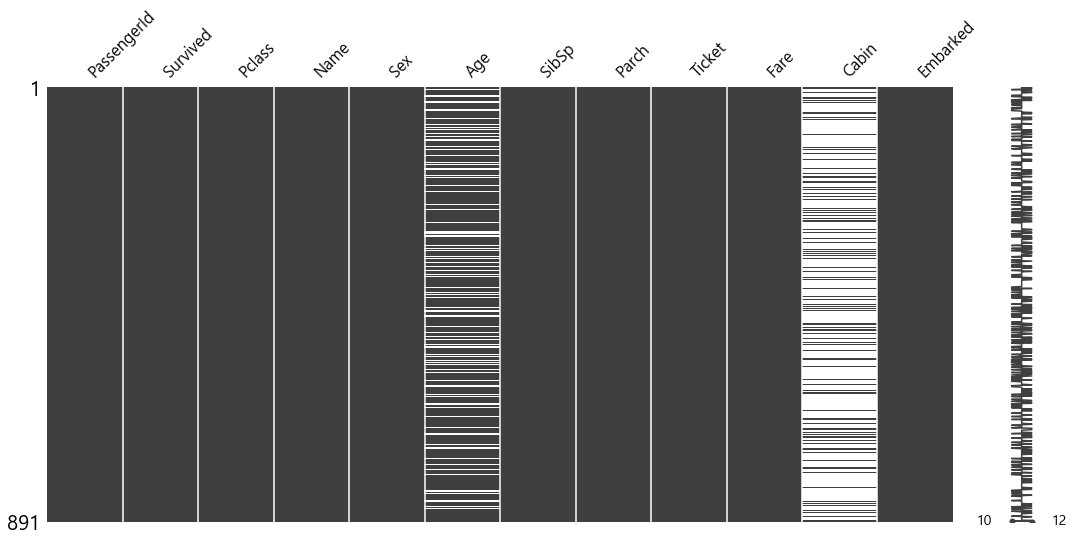

In [12]:
msno.matrix(df_train, figsize = (18, 8))

그래프에 공백의 양에 따라 결측치가 얼마나 많은지를 표현합니다.  
하지만, 몇개의 결측치가 존재하는지 명확하게 파악할 수 없습니다. 

바그래프를 이용해 결측치의 양을 좀 더 명확히 알 수 있습니다.

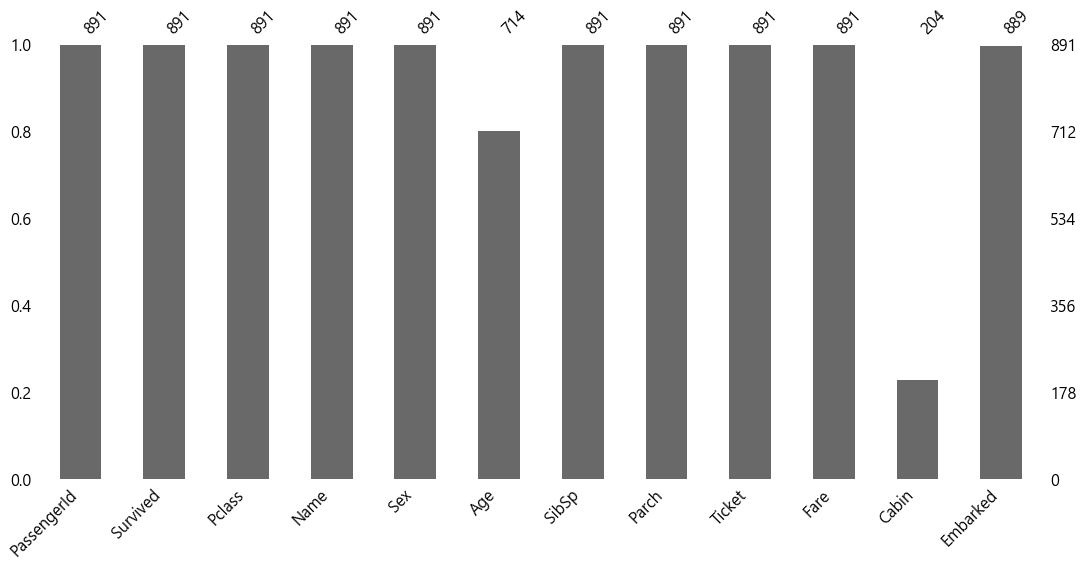

In [13]:
msno.bar(df_train, figsize = (18, 8))

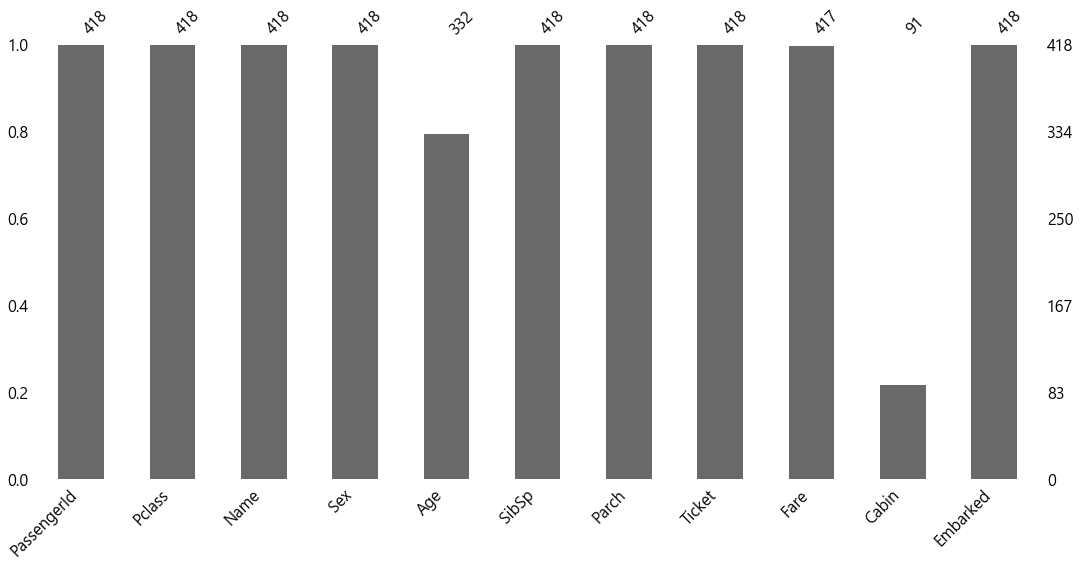

In [14]:
msno.bar(df_test, figsize = (18, 8))

#### 1.4 Survived 분포 확인
Survived, 즉 예측하고자 하는 값의 분포를 확인하는 것은 중요합니다.
train의 분포를 확인하고  
후에 test를 예측후 분포를 확인 했을 때  
비슷한 분포를 갖고 있지 않다면 이는 잘못 예측했다는 증거입니다.

또, 한쪽으로만 편중된 데이터가 존재한다면  
데이터 샘플링이 잘 되지 않았다는 증거가 될 수 있습니다.

Text(0.5, 1.0, 'Count 그래프 : 생존률')

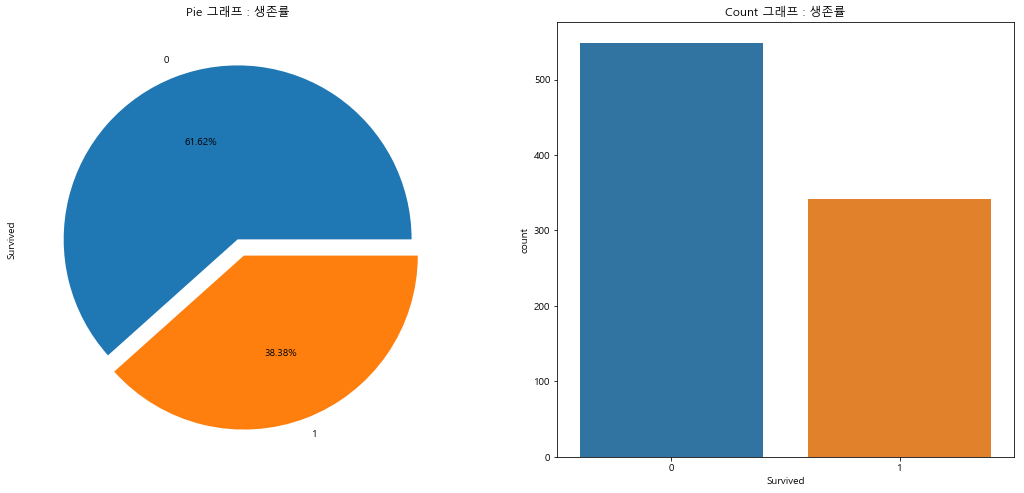

In [15]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived']\
    .value_counts()\
    .plot.pie(explode = (0, 0.1), # pie 그래프가 붙어있는 정도를 표현
              autopct = '%.2f%%', # pie 그래프 안에 소수점 2자리까지 %붙여 표시
              ax = ax[0])
ax[0].set_title('Pie 그래프 : 생존률')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count 그래프 : 생존률')

현재 데이터는 앞서 말씀드린 데이터의 분포와 유사합니다.

2200여명 중 1500여명이 사망했다.  
(약 68%는 사망, 32% 생존)



## 2. 탐색적 자료분석(EDA)


df_train.drop('PassengerId', axis = 1, inplace = True)
df_test.drop('PassengerId', axis = 1, inplace = True)